In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

#### dataset of clients that subscribed to membership card in a Mall

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


the Spending score is attributed for each customer based on his income, how much he spent on the mall ..., we want to make clusters of clients based on the Annual income and the spending score, no idea how many segments there would be, it's a clustering problem

create an array of the two columns Annual income and Spending score

In [8]:
X = dataset.iloc[:, [3,4]].values   ## .values to get an array otherwise we will get a dataframe

In [9]:
X[1:9]

array([[15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3]], dtype=int64)

#### in K-means to get the number of clusters, we used Elbow method, here in the hierarchical  clustering, we will used dendrograms

### Using the dendrogram to find the optimal number of clusters

In [10]:
import scipy.cluster.hierarchy as sch

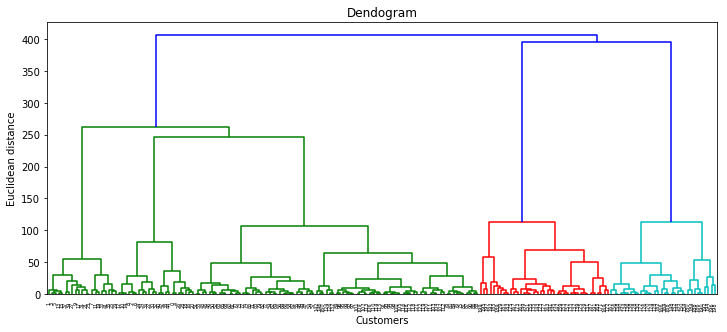

In [15]:
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
## linkage is the hierarchical algorithm of scipy
## ward method is a method which tries to minimize variance within each cluster it's the same as Elbow method that aims to 
## minimize the wcss (within cluster sum of squares) here we minimize the within cluster variance

plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

to find the number of clusters, we need to look for the largest vertical distance without crossing any horizontal line, then count number of vertical lines in the spaces of this largest distance. here we have 5 vertical lines which means 5 clusters as in k-means

### Fitting Hierarchical Clustering to the dataset
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
hc = AgglomerativeClustering(n_clusters= 5, affinity= 'euclidean', linkage= 'ward')

In [18]:
y_hc = hc.fit_predict(X)  ## same way as in kmeans

In [19]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### Visualising the clusters

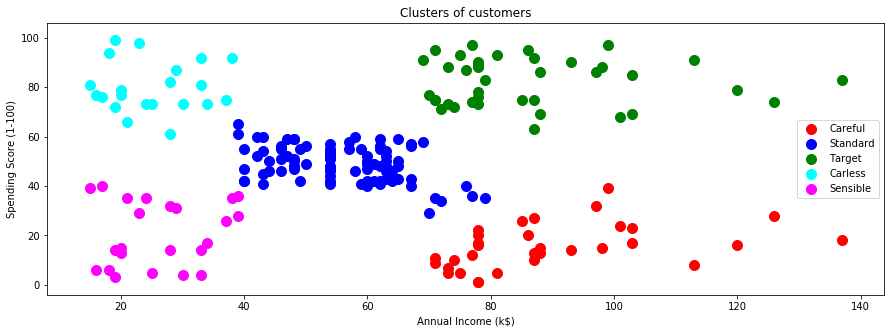

In [22]:
plt.figure(figsize=(15,5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Carless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()